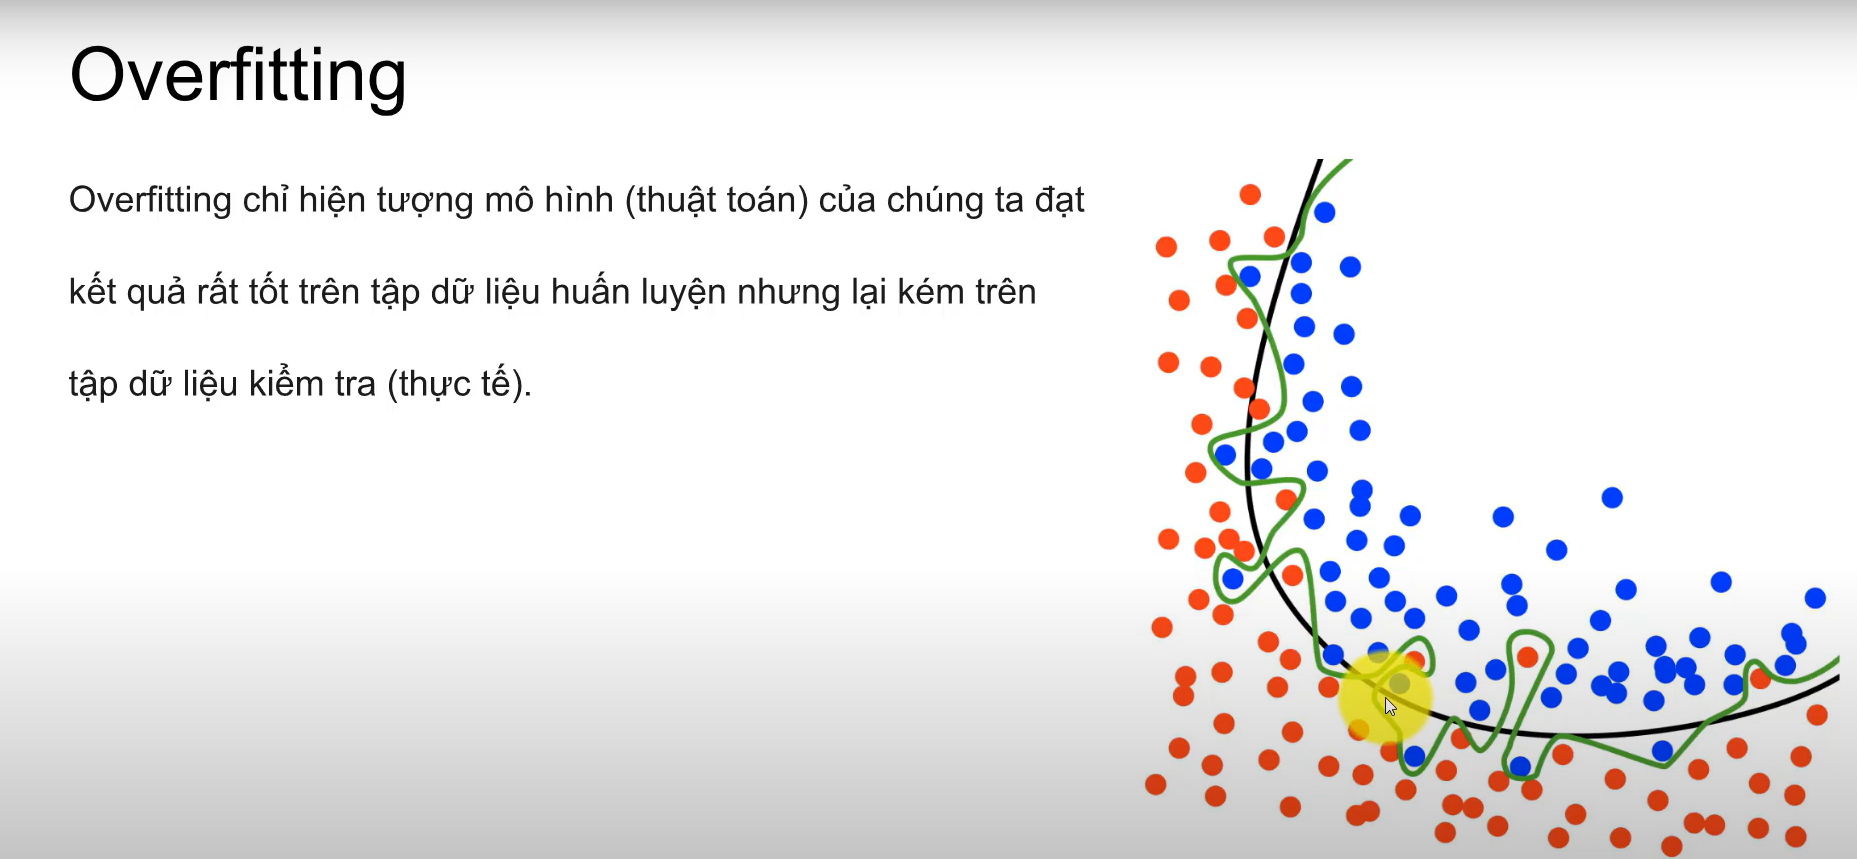
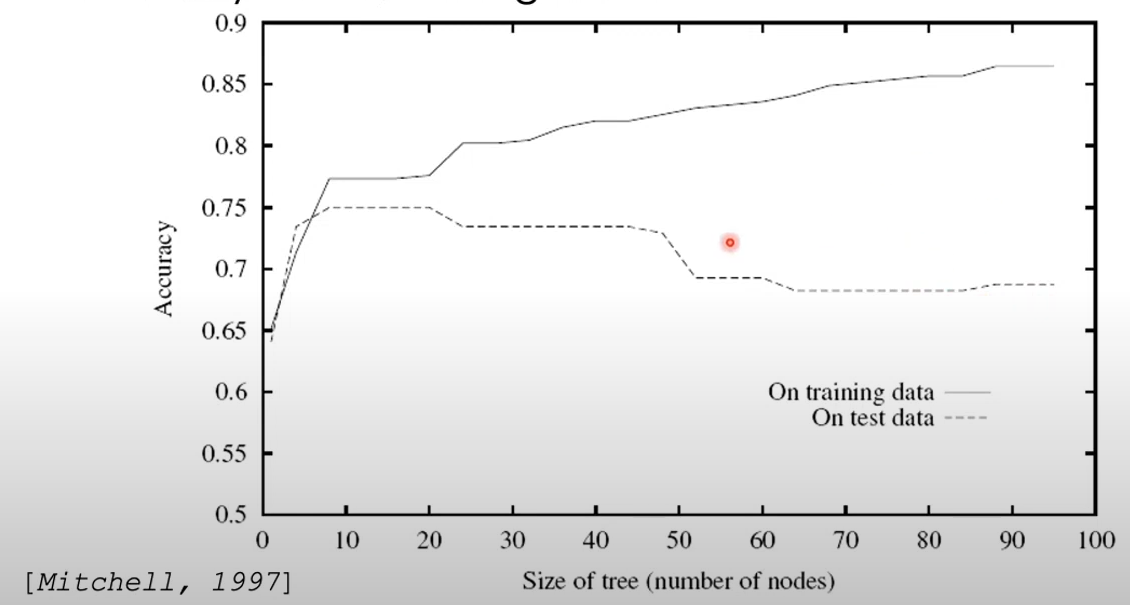
<h1>Một số lý do dẫn đến overfiting</h1>
<h3>Model lựa chọn quá phức tạp ví dụ như có quá nhiều tham số</h3>
<h3>Dữ liệu có nhiễu có lỗi nhiều</h3>
<h3>Dữ liệu huấn luyện quá bé mô tả được ít không gian dữ liệu</h3>

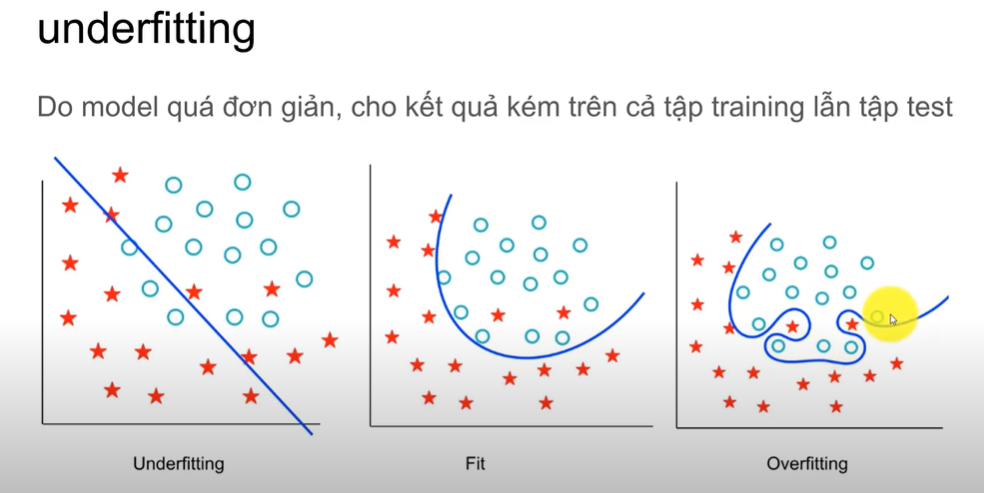

<h1>Một số lý do dẫn đến underfiting</h1>
<h3> Đối với những bộ dữ liệu lớn nhưng sử dụng mô hình quá nhỏ thì sẽ không đủ khả năng biểu diễn tốt dữ liệu. Chẳng hạn như hình ngoài cùng bên trái của hình 2 nếu chỉ sử dụng đường biên là một đường thẳng tuyến tính giản đơn thì không đủ sức mạnh để phân loại dữ liệu. Khi đó ta cần chuyển sang những lớp mô hình phức tạp hơn.</h3>

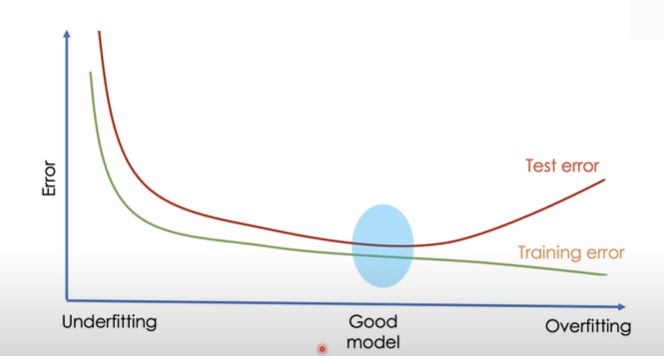
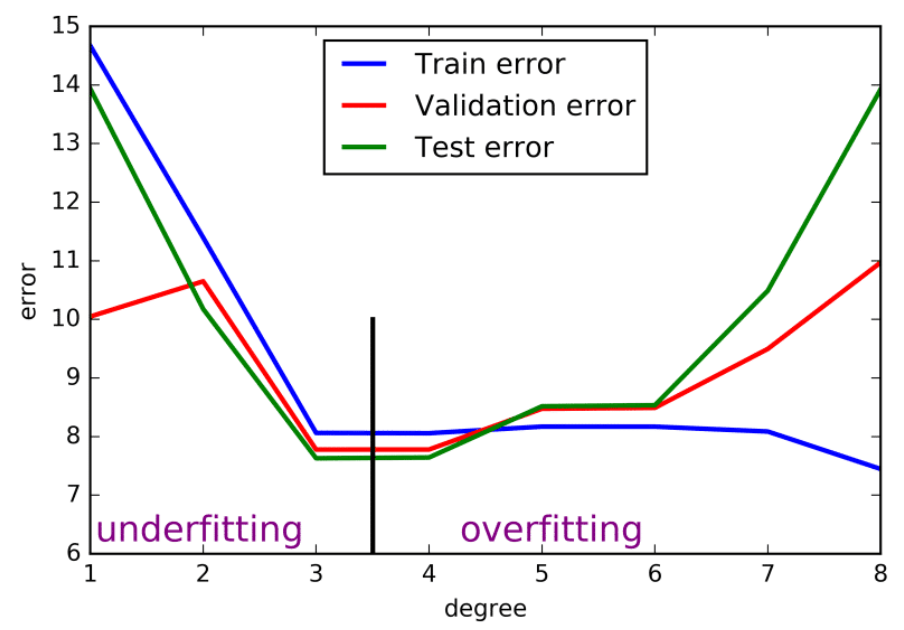
<h1>3. Validation Set là gì?</h1>
<h3>Trước khi nắm được Validation Set bạn cần tìm hiểu khái niệm Overfitting. Giống như training set, validation set cũng bao gồm các cặp giá trị input và output tương ứng. Tuy nhiên, input & output không dùng để huấn luyện trong quá trình máy học mà sử dụng để kiểm tra độ chính xác của mô hình máy học trong quá trình huấn luyện. Vậy sự khác nhau giữa công dụng Testing Set và Validation Set là gì ?  Testing được dùng để kiểm thử sau quá trình huấn luyện, còn validation set được sử dụng để kiểm thử trong quá trình huấn luyện. Chính vì vậy, thuật ngữ overfitting (hiện tượng mô hình dự đoán quá khớp với tập training set, dẫn đến dự đoán không hiệu quả đối với tập testing set.) cần phải nắm rõ trong quá trình sử dụng. Thông thường, người ta ngầm cho rằng Validation set mà có độ chính xác cao thì tập Testing set cũng có độ chính xác cao. Do đó, quá trình training chủ yếu dựa trên kết quả của tập Validation set chứ không phải tập training set.

=> Validation set là tập các giá trị input đi kèm với giá trị output và được dùng để kiểm thử độc chính xác của mô hình máy học trong quá trình huấn luyện.

</h3>

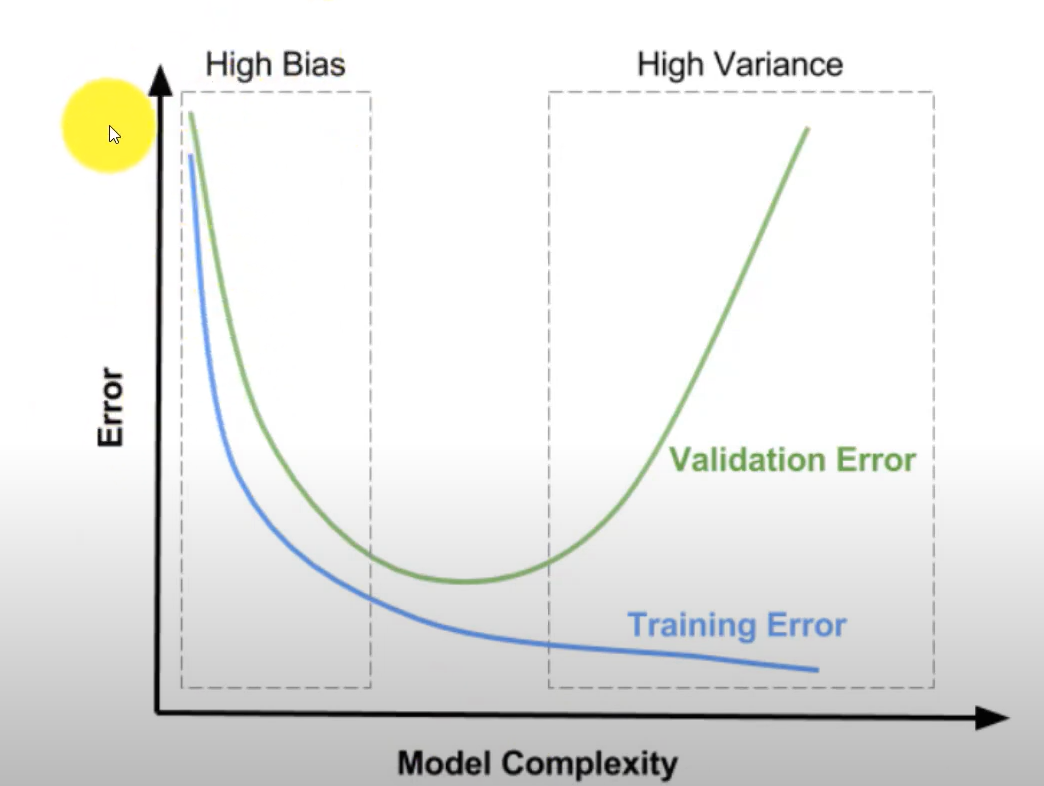
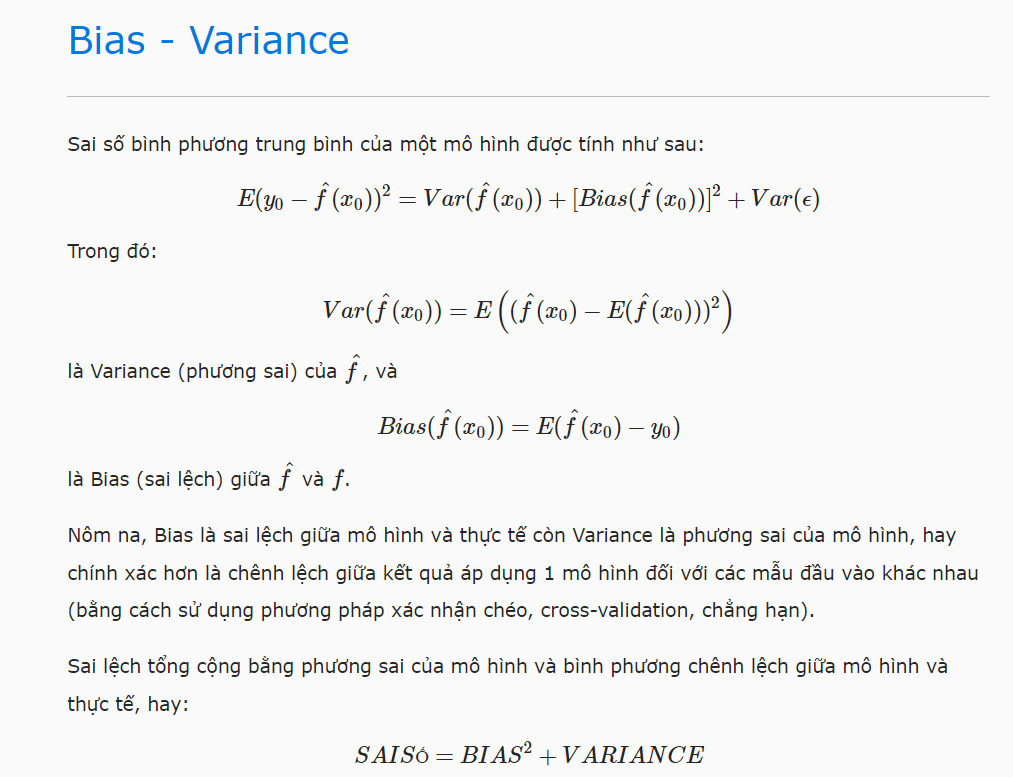

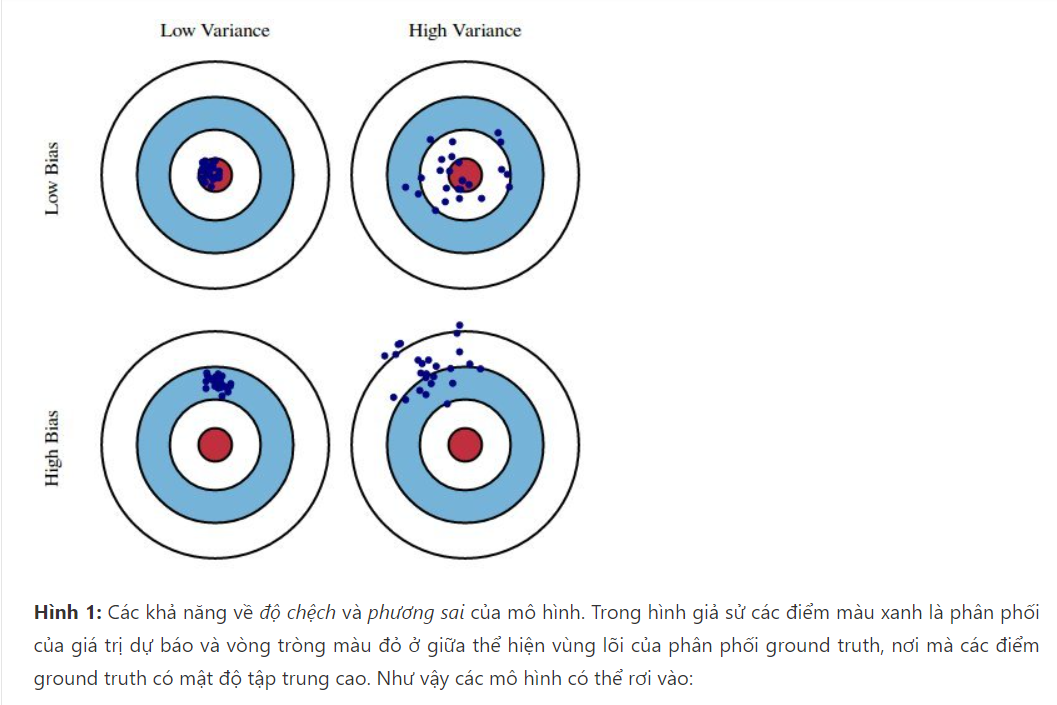

<h1>Cách xác định overfit và underfit</h1>
<h3>Nếu thước đo cho thấy kết quả dự báo mô hình trên tập huấn luyện tốt hơn so với tập kiểm tra thì ta nói mô hình gặp hiện tượng quá khớp. Ở đây ta dùng từ tốt hơn có nghĩa là thước đo đó có thể lớn hơn hoặc nhỏ hơn tuỳ thuộc vào từng loại thước đo. Chẳng hạn như thước đo là độ chính xác (accuracy) thì tốt hơn nghĩa là lớn hơn, còn đối với sai số MSE thì tốt hơn đồng nghĩa với nhỏ hơn.</h3>

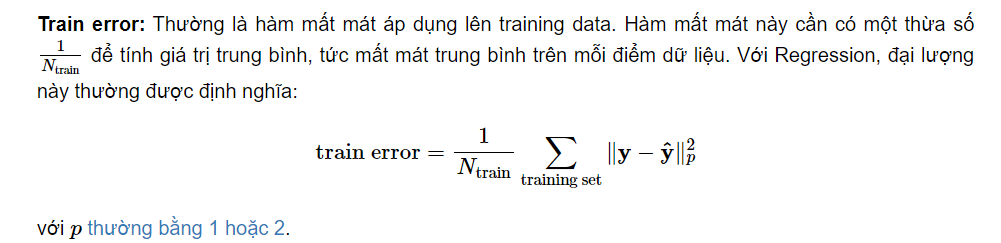
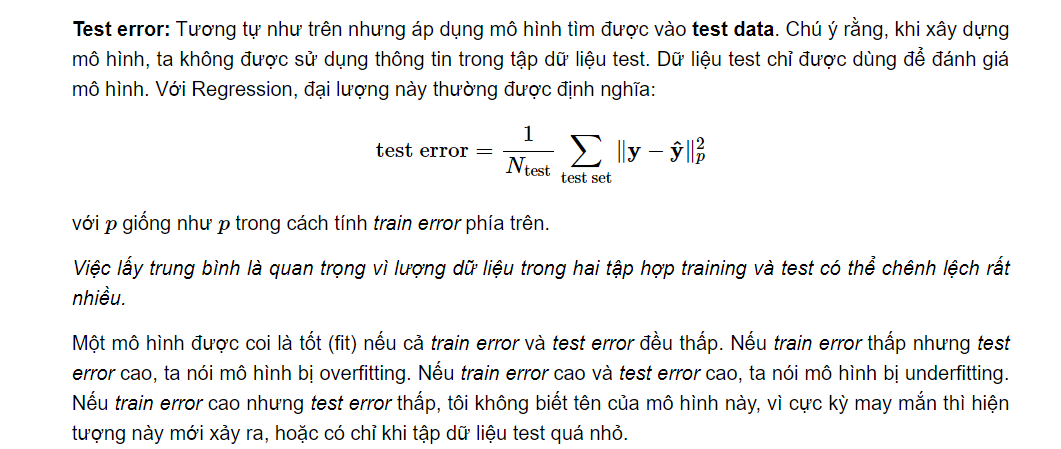


<h1>Ví dụ</h1>

(30,) (30,)


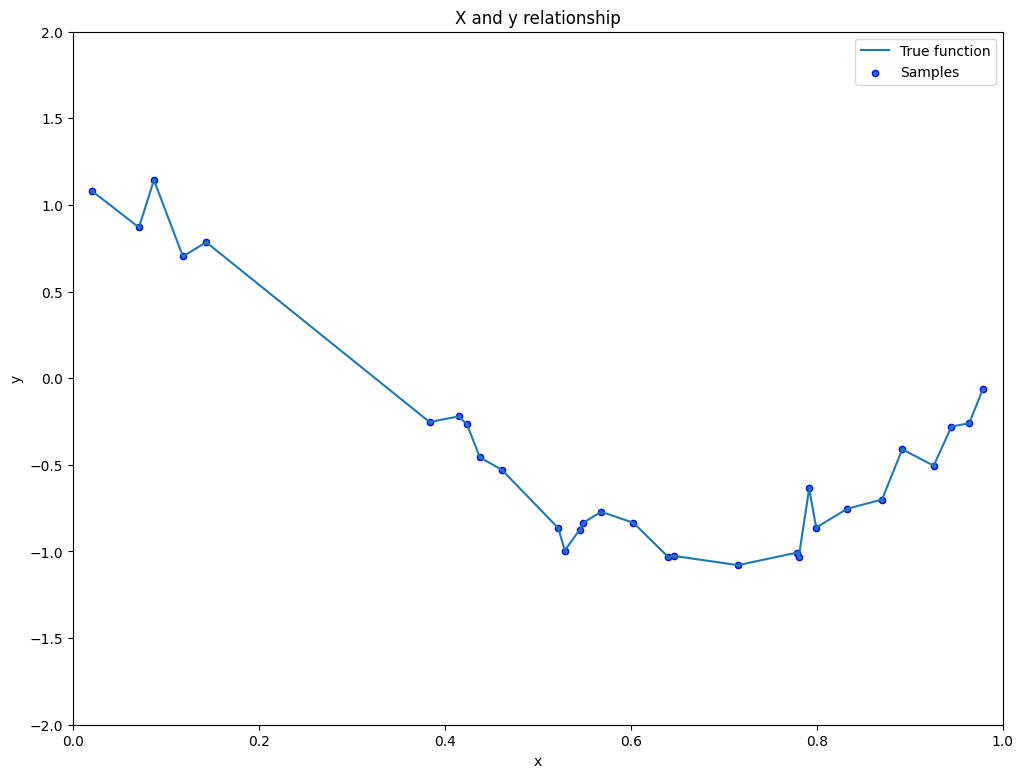

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_train_samples, n_test_samples = 30, 10

X_train = np.sort(np.random.rand(n_train_samples))
y_train = true_fun(X_train) + np.random.randn(n_train_samples) * 0.1

print(X_train.shape, y_train.shape)

def plot(X, y, figure=(12, 9)):
  plt.figure(figsize=figure)
  plt.plot(X, y, label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.legend(loc='best')
  plt.title('X and y relationship')
  
plot(X_train, y_train)

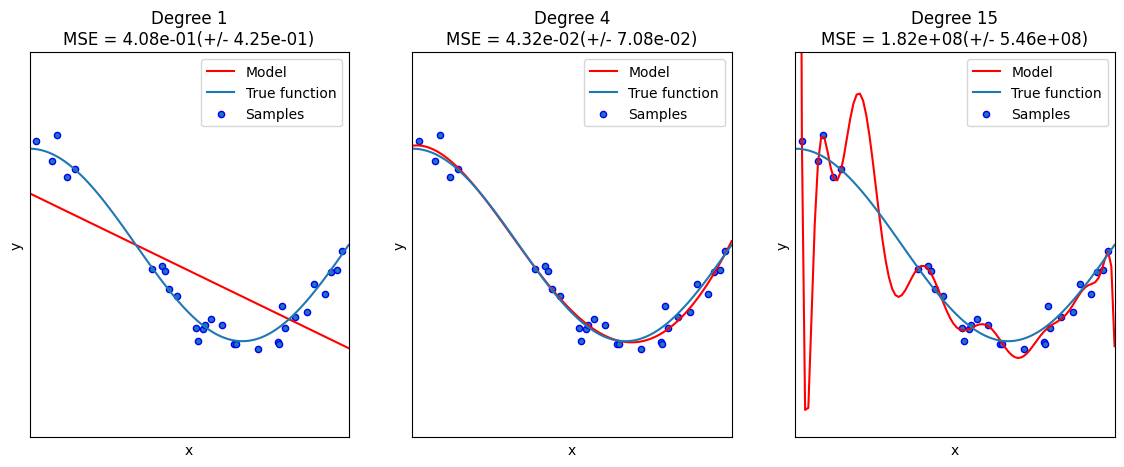

In [2]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Tạo các Featuer bậc degrees[i] cho mô hình.
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    # Hồi qui tuyến tính
    linear_regression = LinearRegression()
    
    # Pipeline đơn giản cho mô hình từ feature engineering tới hồi qui tuyến tính
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    
    # Huấn luyện mô hình
    pipeline.fit(X_train[:, np.newaxis], y_train)

    # Đánh giá mô hình sử dụng cross validation
    scores = cross_val_score(pipeline, X_train[:, np.newaxis], y_train,
                             scoring='neg_mean_squared_error', cv=10)

    # Dự báo trên tập huấn luyện
    X_test = np.linspace(0, 1, 100)
    y_test_pred = pipeline.predict(X_test[:, np.newaxis])

    # Vẽ biểu đồ trên tập huấn luyện
    plt.plot(X_test, y_test_pred, color='r', label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X_train, y_train, edgecolor='b', s=20, label='Samples')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc='best')
    
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

<h1>Xử lý hiện tượng quá khớp và vị khớp</h1>
<h3>Có nhiều phương pháp và kỹ thuật khác nhau để xử lý hiện tượng quá khớp và vị khớp, xong chúng đều xuất phát từ hai khía cạnh đó là tập trung vào mô hình (model centric) hoặc tập trung vào dữ liệu (data centric).

Tập trung vào mô hình là nhằm sử dụng những kiến trúc và thuật toán tốt hơn nữa để tăng hiệu suất mô hình. Ví dụ như trong bài toán phân loại của học có giám sát chúng ta có thể sử dụng những lớp mô hình có độ phức tạp cao hơn như Random Forest, Decision Tree, SVM thay cho những lớp mô hình độ phức tạp thấp như Logistic Regression như một cách tiếp cận theo hướng model centric.

Tập trung vào dữ liệu thường được sử dụng khi đã lựa chọn được một mô hình đủ tốt, những sự thay đổi về kiến trúc của mô hình không tạo ra cải thiện thêm về hiệu suất. Khi đó cần mở rộng bộ dữ liệu cả về chất lượng và số lượng để tạo ra những cải thiện đột phá cho mô hình. Một trường hợp khác mà cần áp tập trung vào dữ liệu ngay từ đầu đó là bộ dữ liệu có kích thước quá nhỏ và chất lượng của bộ dữ liệu không được tốt chẳng hạn như nhiều dữ liệu khuyết (missing data) và điểm ngoại lệ (outliers). Nếu huấn luyện mô hình trên những dữ liệu kém chất lượng như vậy thì sử dụng các kiến trúc SOTA cũng không mang lại hiệu quả.</h3>

<h1>Phương pháp</h1>
<h3>Cross-validation</h3>
<h3>Regularization(Hiệu chỉnh)</h3>

<h1>Cross-validation</h1>

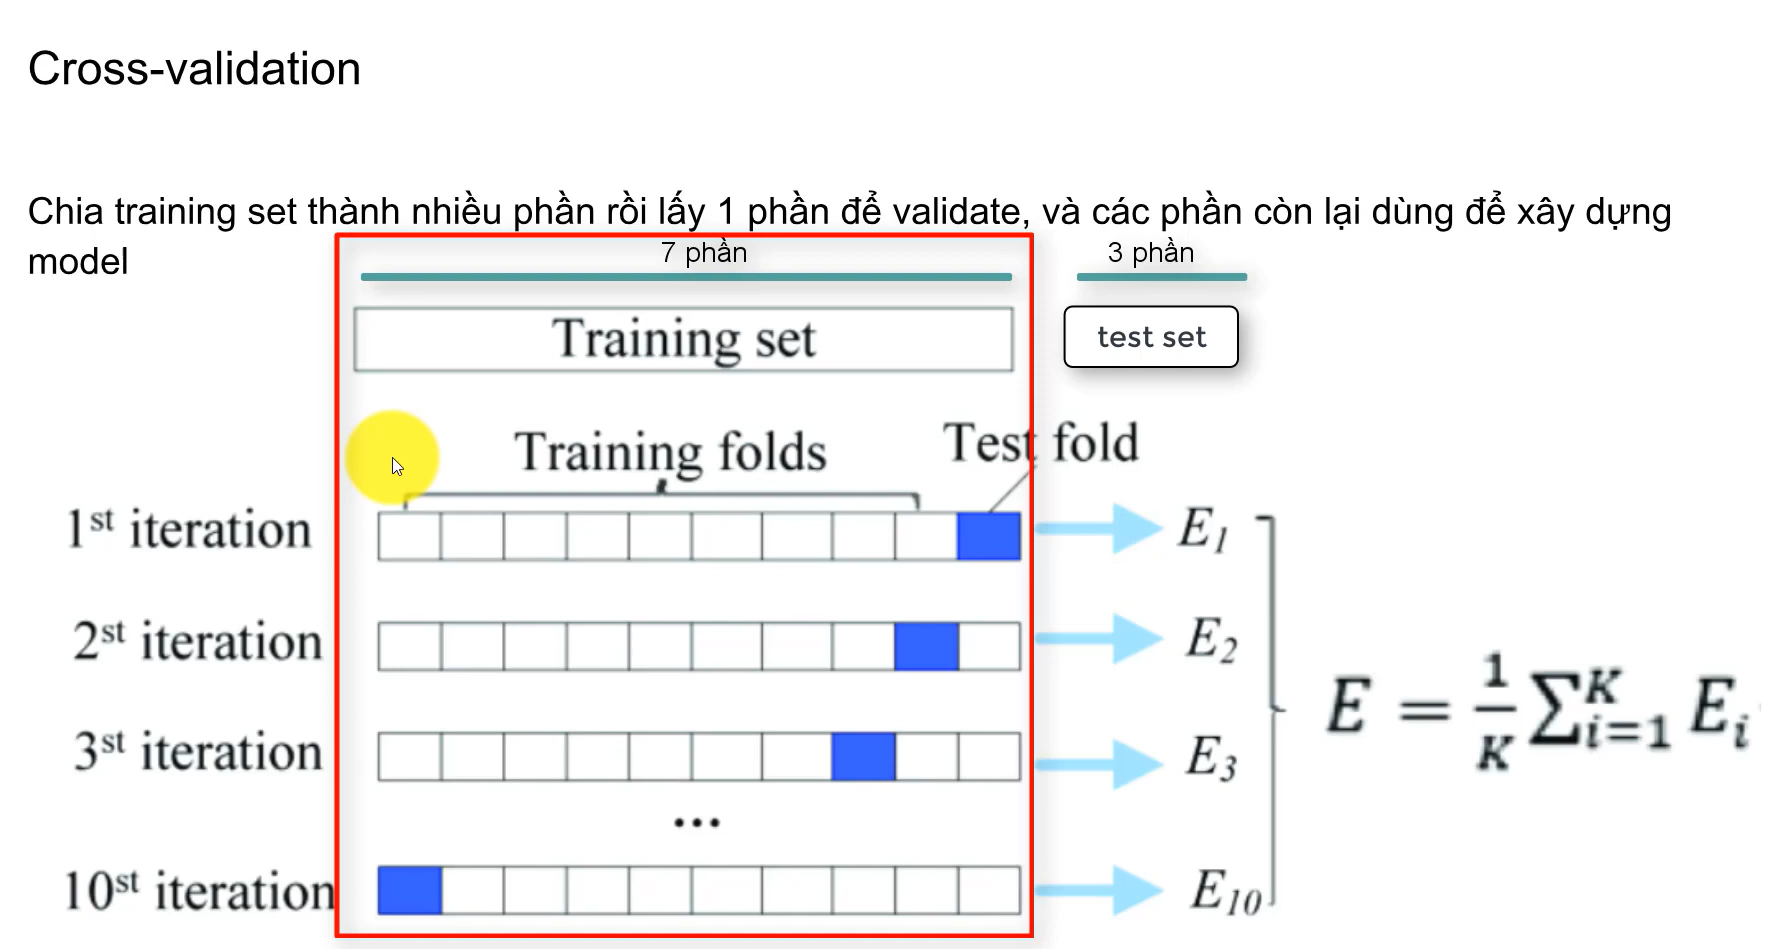
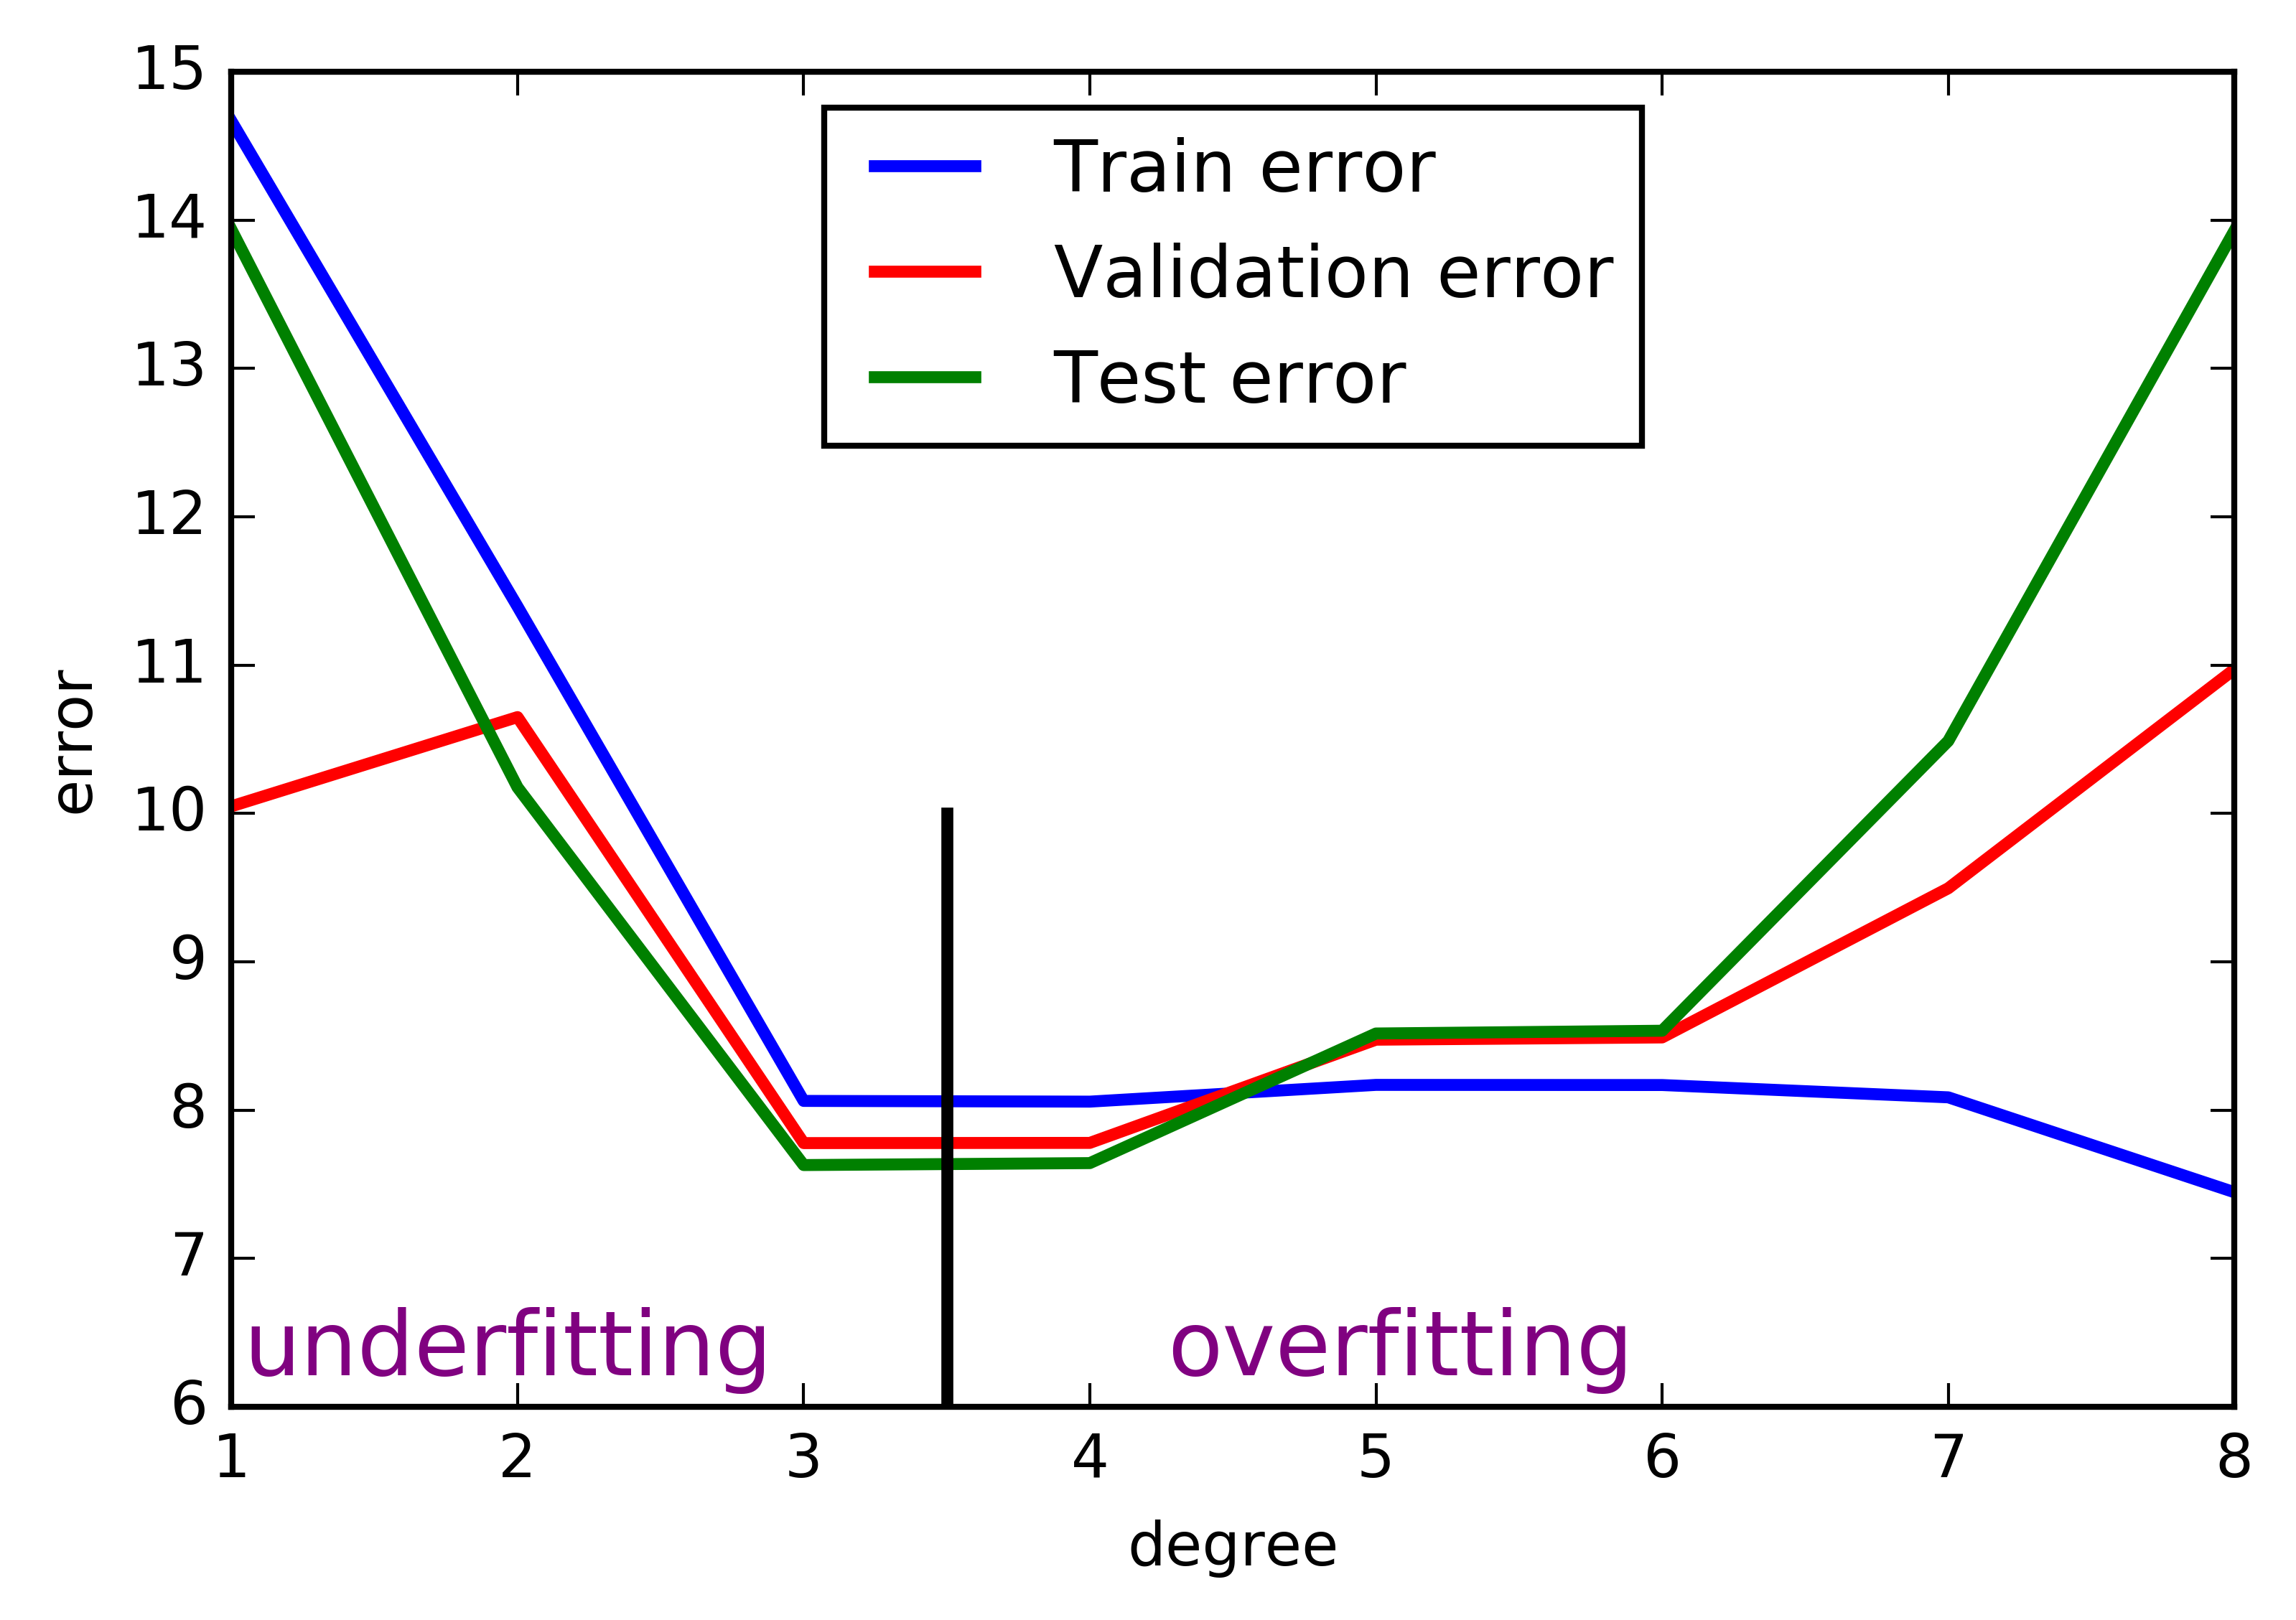
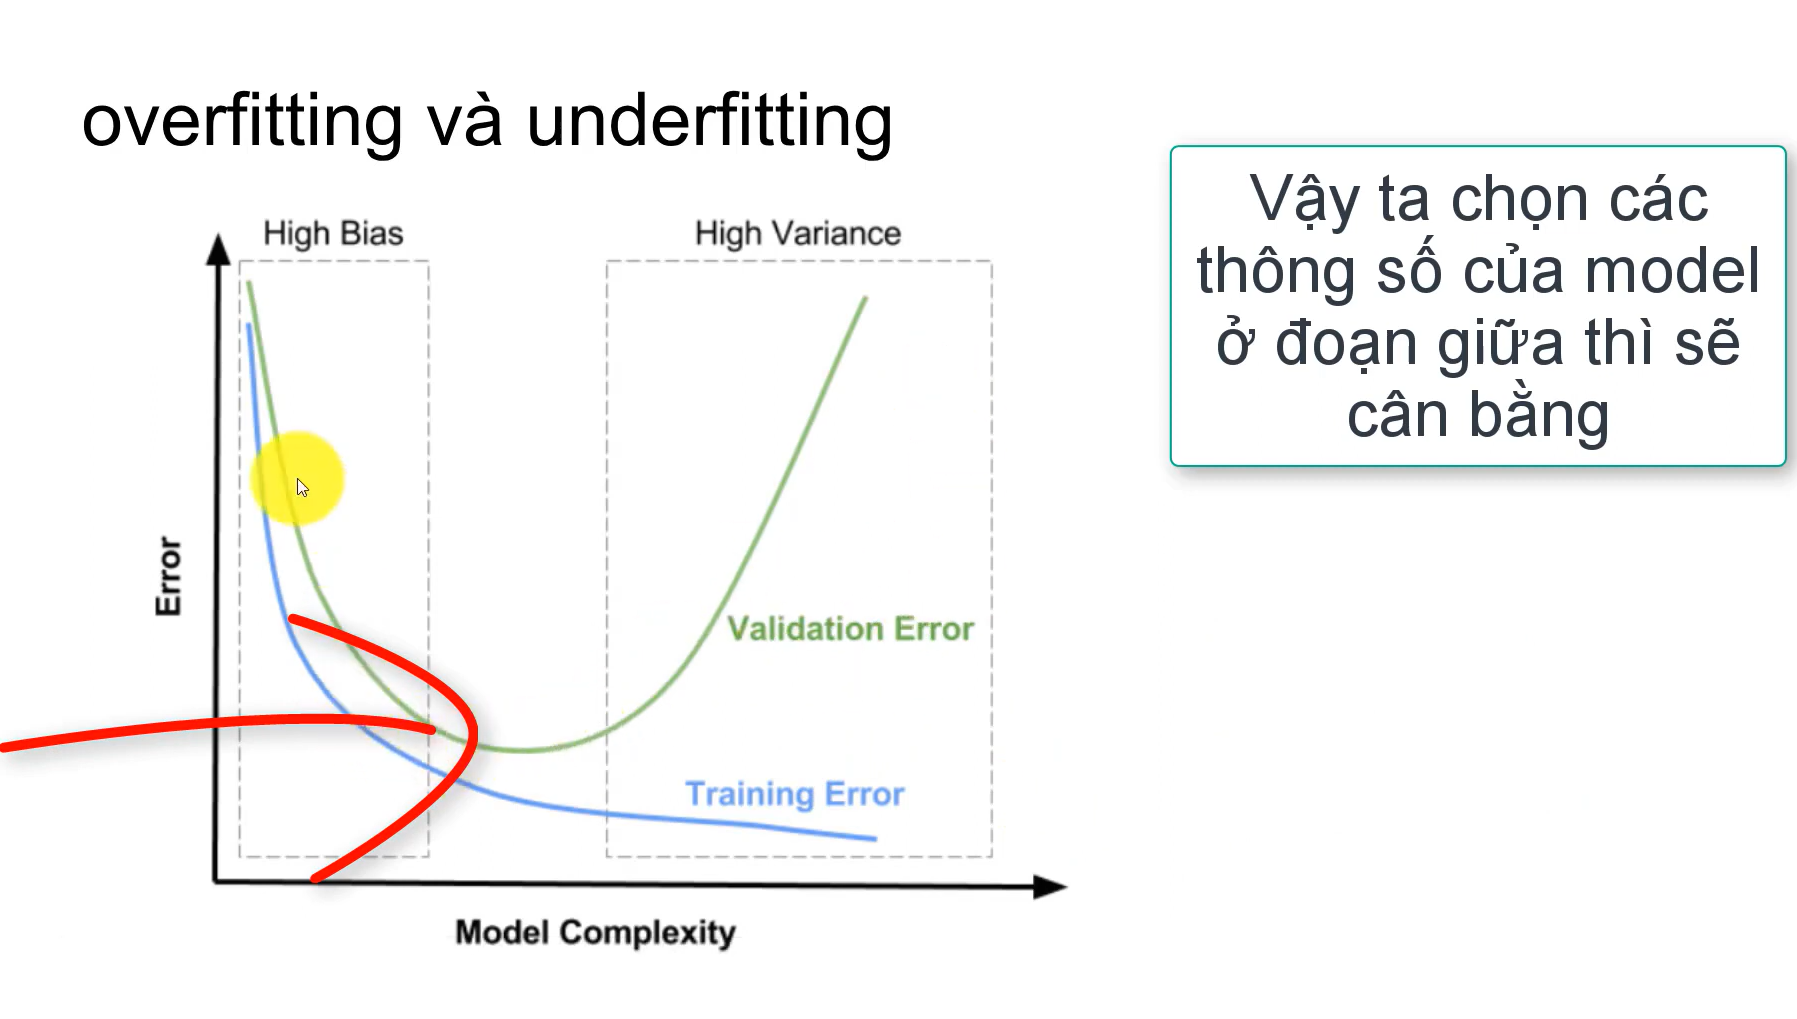

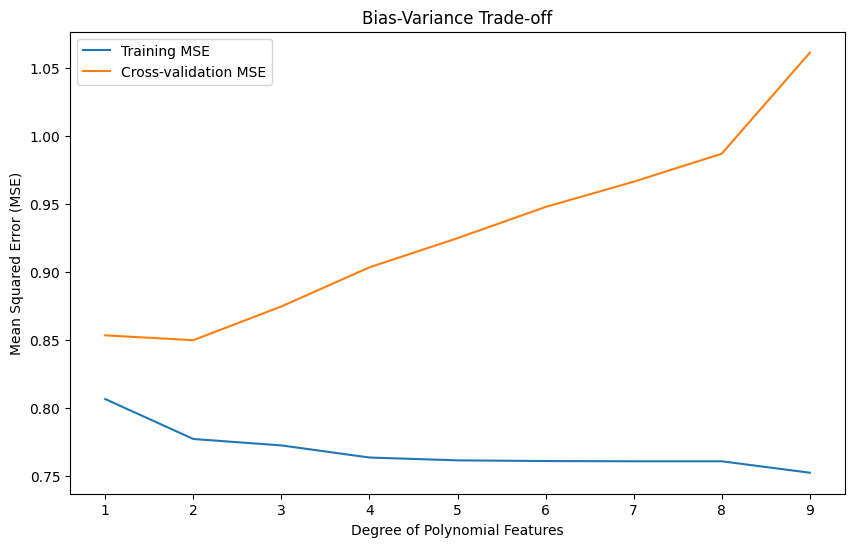

Best Degree: 2


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Tạo dữ liệu giả định
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Hàm để tính MSE
def calculate_mse(model, X, y):
    y_pred = model.predict(X)
    mse = np.mean((y_pred - y) ** 2)
    return mse

# Đánh giá và chọn mô hình tốt nhất
degrees = np.arange(1, 10)
mse_train = []
mse_cv = []

for degree in degrees:
    # Tạo pipeline với PolynomialFeatures và LinearRegression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Đánh giá mô hình bằng cross-validation
    mse_cv.append(-np.mean(cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')))
    
    # Huấn luyện mô hình trên toàn bộ tập huấn luyện
    model.fit(X, y)
    
    # Tính MSE trên tập huấn luyện
    mse_train.append(calculate_mse(model, X, y))

# Vẽ đồ thị độ chệch và phương sai theo độ phức tạp của mô hình
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_train, label='Training MSE')
plt.plot(degrees, mse_cv, label='Cross-validation MSE')
plt.title('Bias-Variance Trade-off')
plt.xlabel('Degree of Polynomial Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

best_degree = degrees[np.argmin(mse_cv)]
print("Best Degree:", best_degree)


<h1>Nhược điểm</h1>

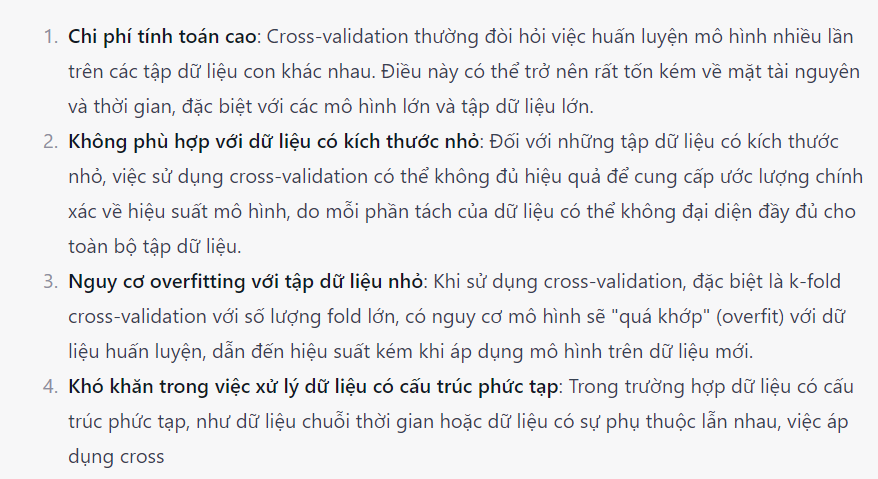

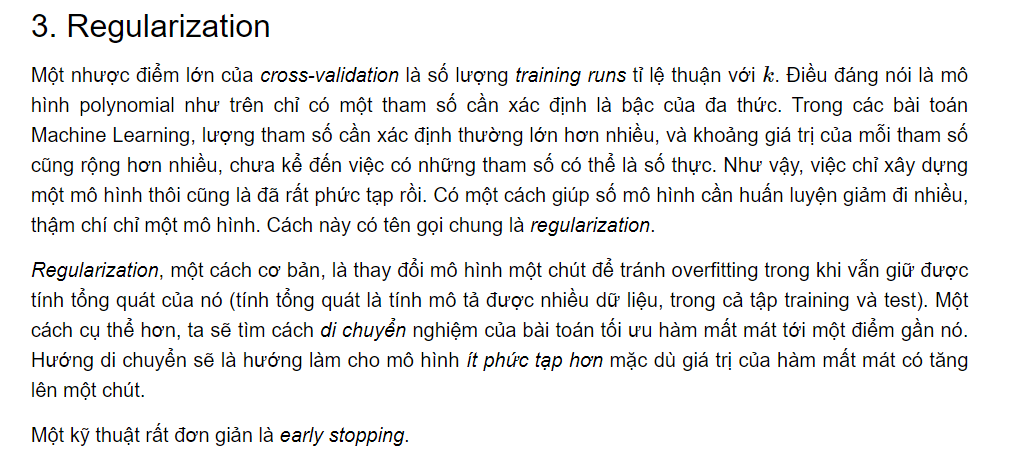

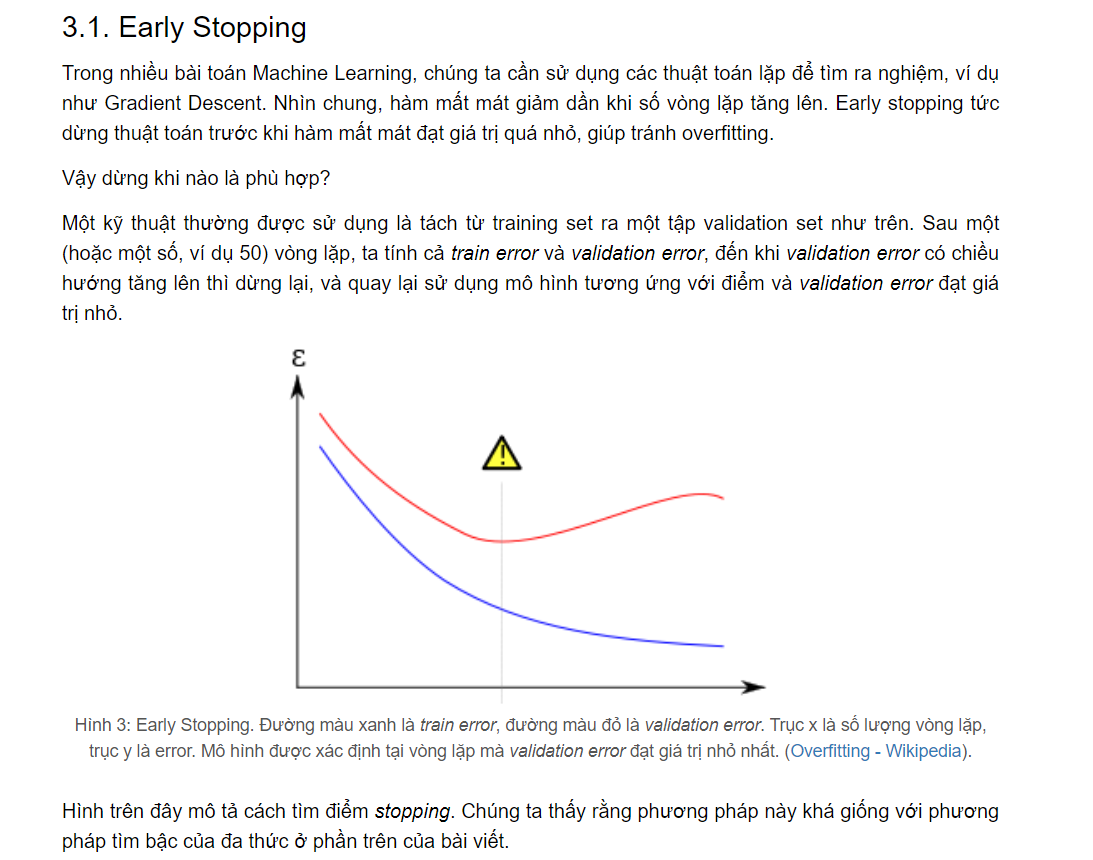

<h1>Regularization</h1>

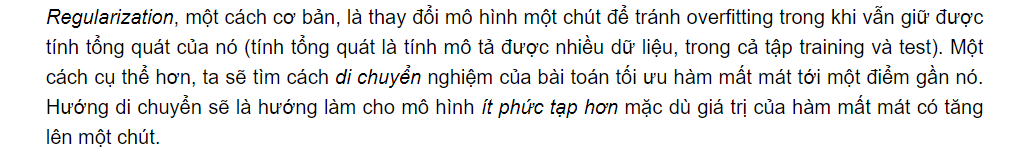

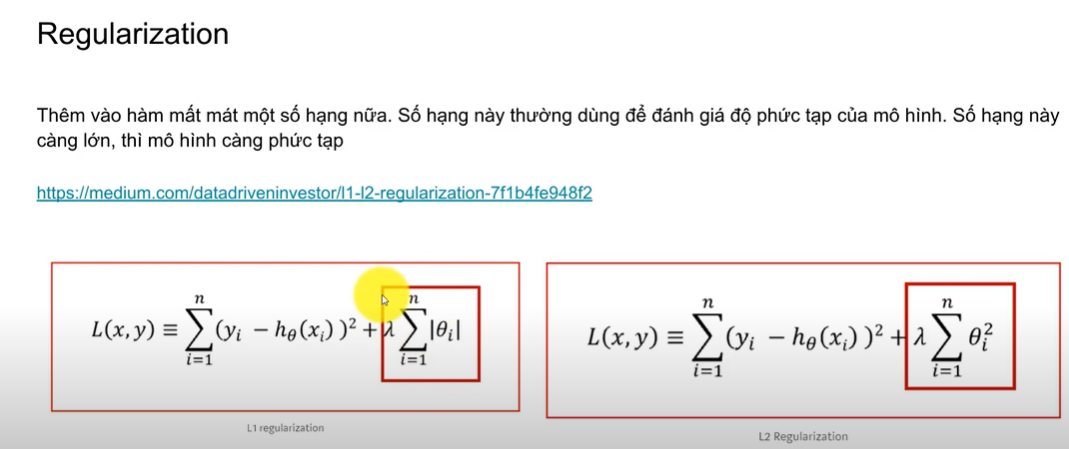

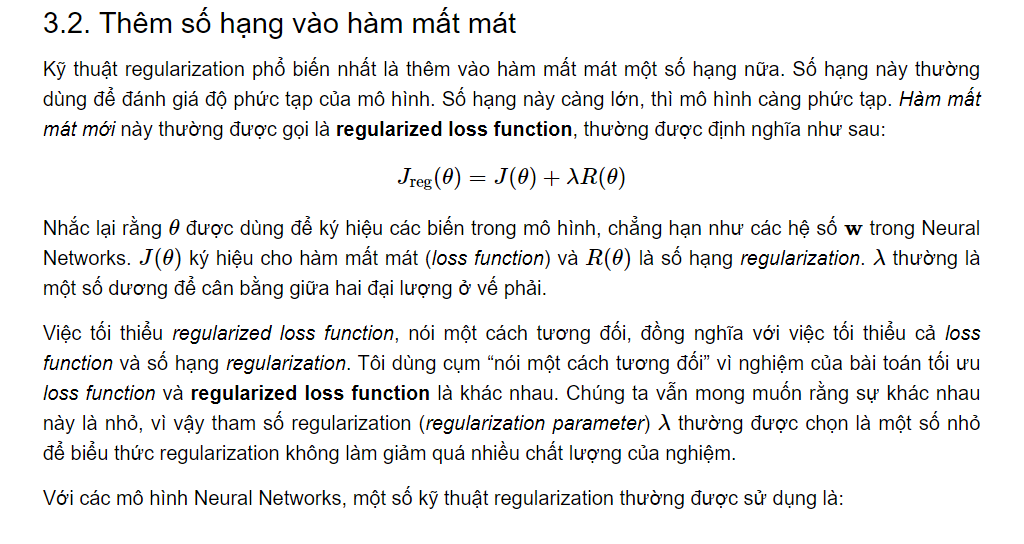

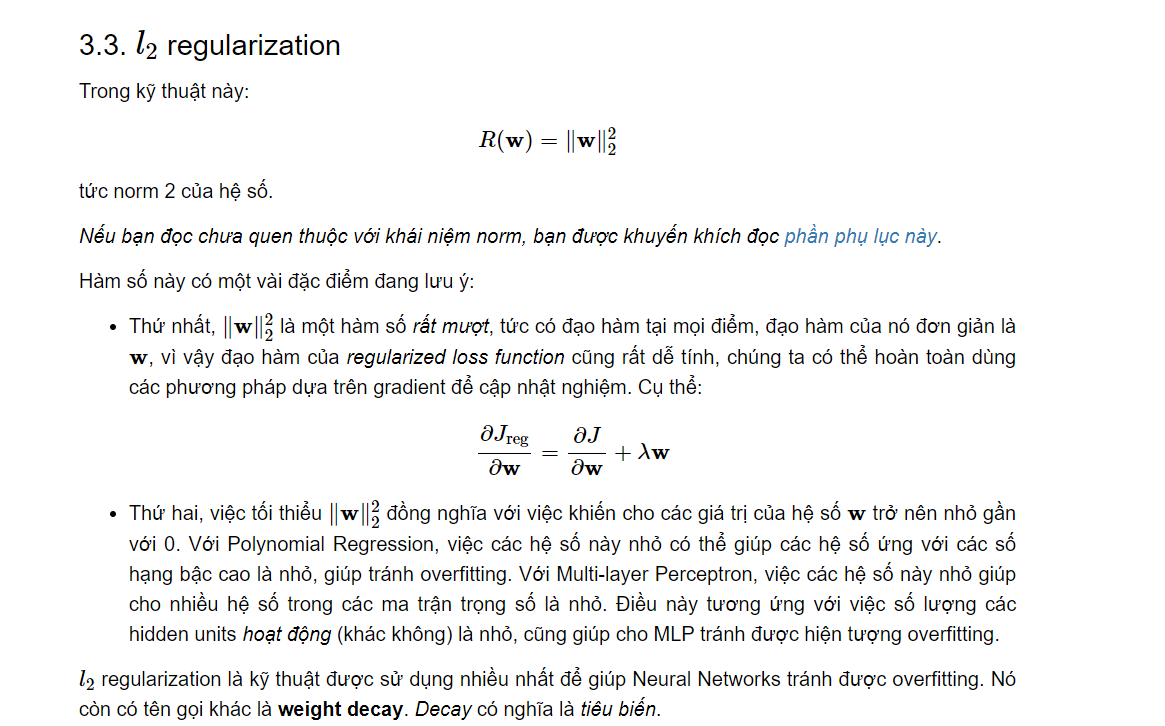

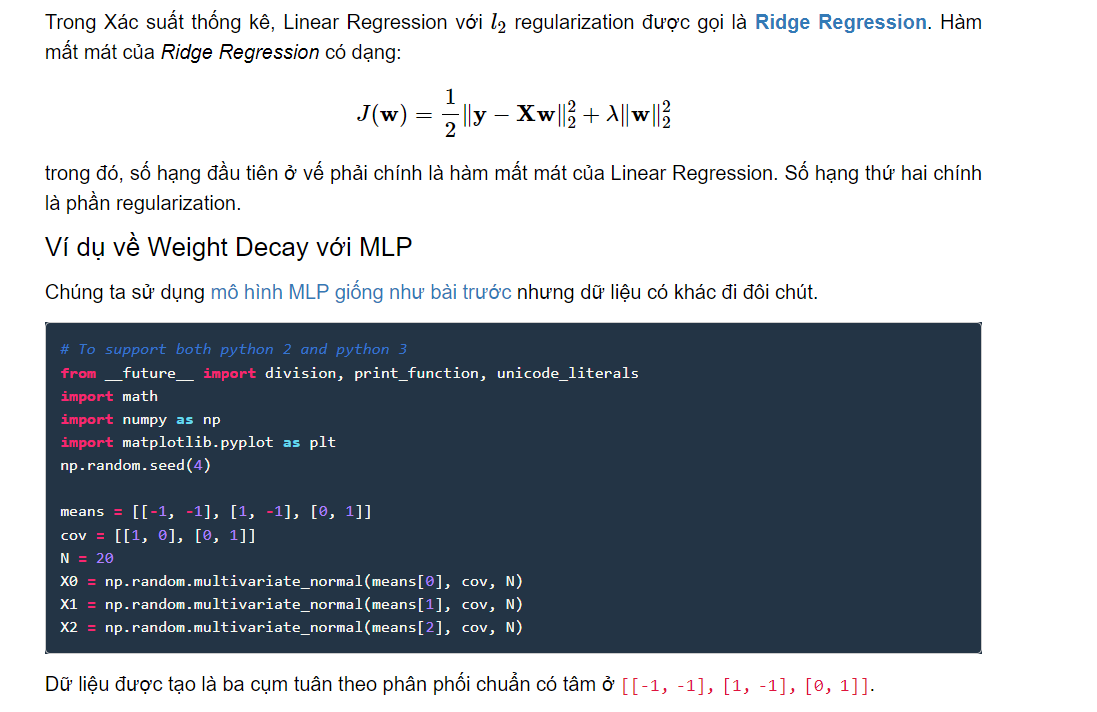

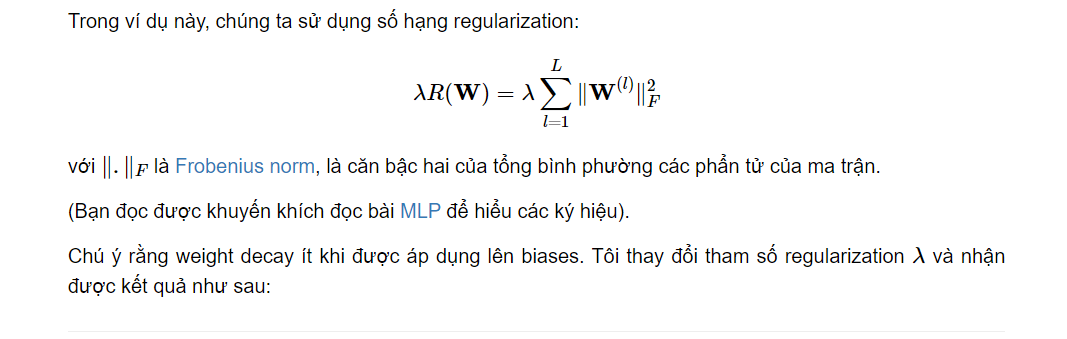

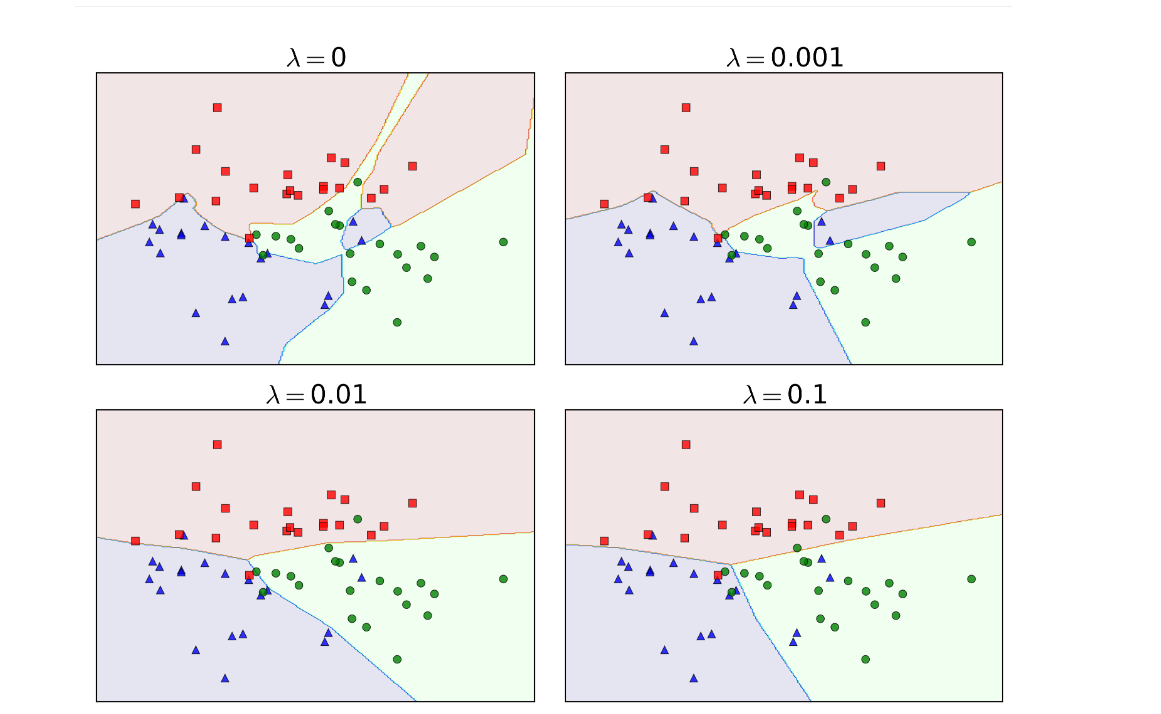

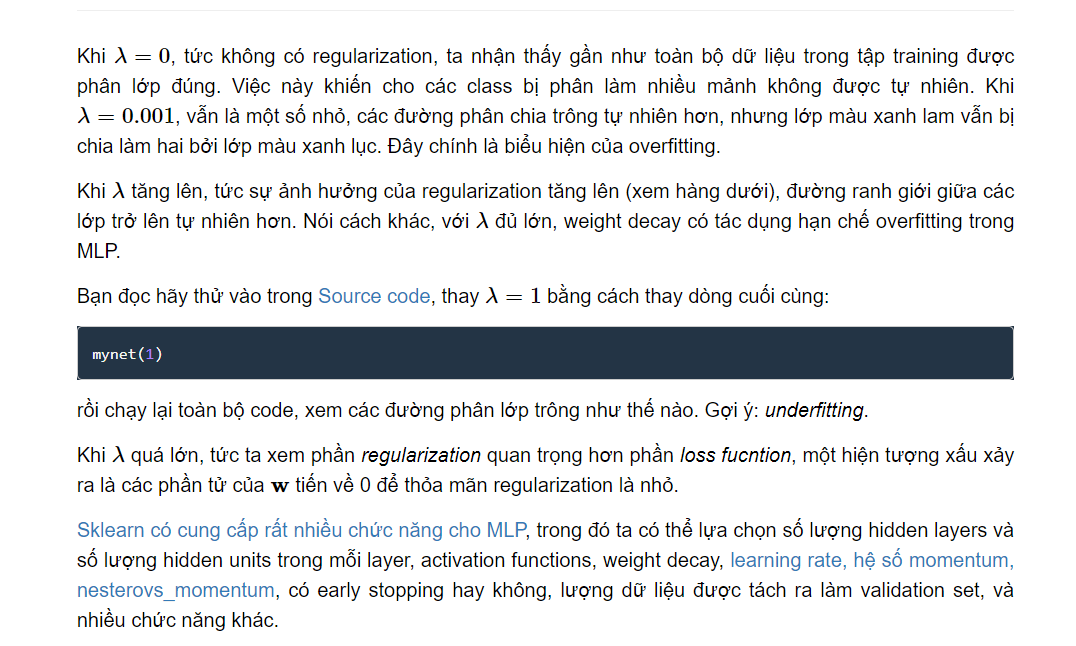

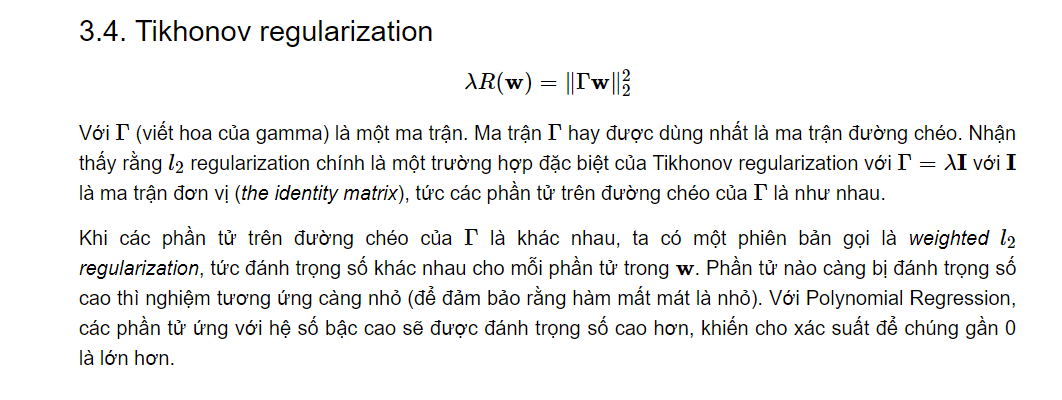

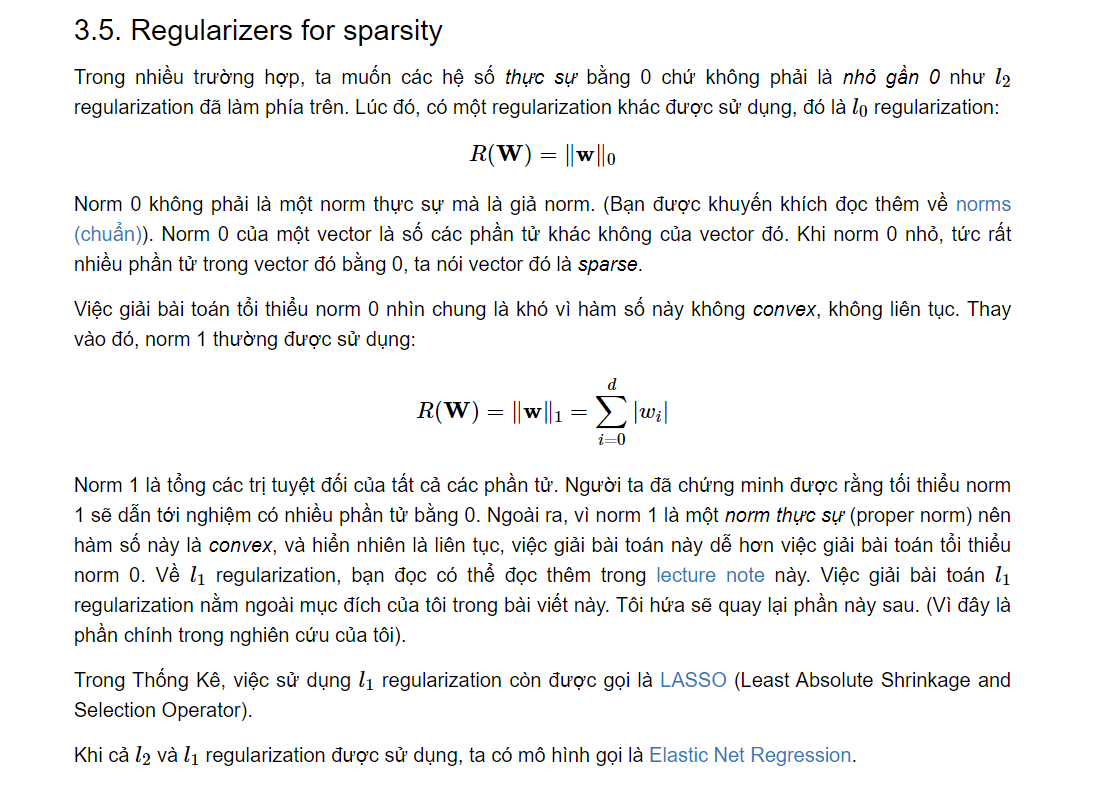

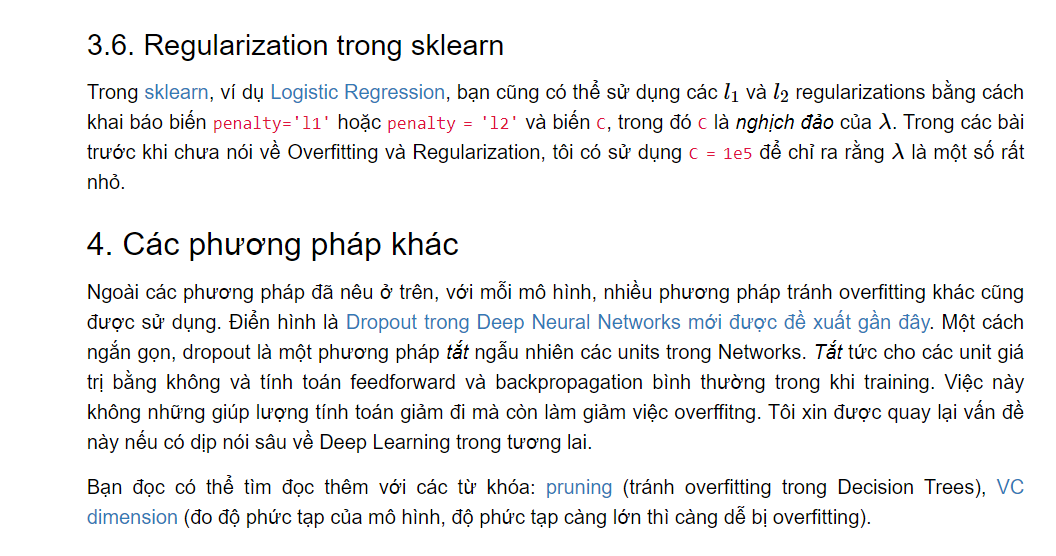

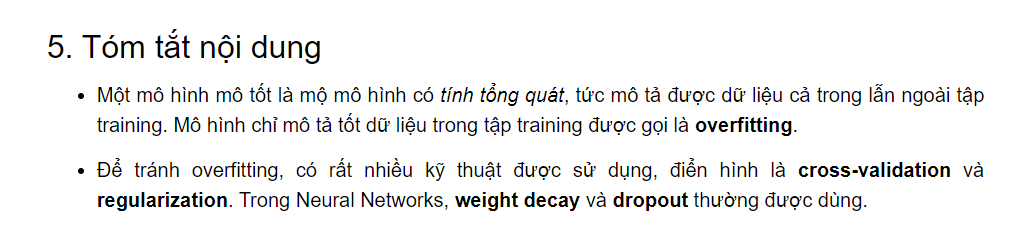